## Reward Signals
Data Collected at Rutgers University by David Smith

### Variable Key

#### Raw Data Names
- soc_win - affective feedback in a trial. 0 lose and 1 is win 
- partner - 0 is nonsocial and 1  is social
- deckchoice - 1 or 2 based on participant choice of option. 1 = star, 2 = pentagon
- lapse1 and lapse2 - participant did not respond in respective decision phase

#### Derived Data Names
##### Columns renamed
- index - renamed from raw data index
- choice - renamed from raw data column 'deckchoice'
- is_social - renamed from raw data column 'partner'
- aff_feedback_curr - renamed from raw data 'soc_win'

##### Columns derived
- aff_feedback_prev - aff_feedback_curr shifted by one trial to reflect trial -1
- prev_is_social - is_social shifted by one trial to reflect trial -1
- prev_aff_fb - affective feedback in the previous trial, 0 is lose and 1 is win
- star_points - known value of option 1 
- pentagon_points - known value of option 2 
- diff_point - star_points - pentagon_points

In [1]:
import pandas as pd
from utility import *

#subject class for easy dataframe access
class Subject():

    def __init__(self, subnum):
        self.subnum = subnum
        self.matfiles = [i for i in file_list if str(subnum) in i]
        self.df = make_derived_df(self.matfiles)

#### Logistic Models

In [2]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import scipy.stats as stats

#list of regressors
subset = ['choice', 'is_social','prev_diff_points']

#gets beta weights predicting choice 
def get_model_weights(df):
    
    #data labels, recode 1 and 2 as 0 and 1
    label = df.choice - 1
    
    #z-score all regresors in analysis
    data= Subject(i).df[subset].iloc[:, 1:].apply(stats.zscore)

    data = data.apply(stats.zscore)
    #data['social prev_aff * difference'] = data['aff_feedback_prev_social'] * data['prev_diff_points']
    #data['nonsocial prev_aff * difference'] = data['aff_feedback_prev_nonsocial'] * data['prev_diff_points']

    
    y = np.array(label.values.tolist()).ravel()
    x = np.array(data.values.tolist())
    clf = LogisticRegression()
    clf.fit(x, y)
    return clf.coef_[0].tolist() 

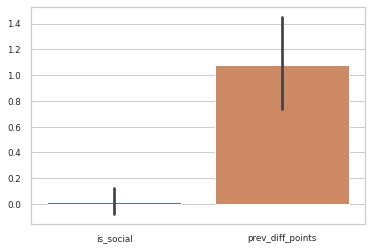

In [4]:
#get subject list from list of files 
subject_list = (pd.Series([(i.split('/'))[1] for i in file_list]).unique())

#make dataframe where subjects are rows and B0 per regressor are columns 
df = pd.DataFrame()
for i in subject_list: 
    x = list({i: get_model_weights(Subject(i).df)}.values())[0]
    df[i] = x

df = df.transpose()

df.columns = ['is_social',
              'prev_diff_points']

#plot
sns.set(font_scale=.8)
sns.set_style("whitegrid")
ax = sns.barplot(data=df)#

In [ ]:
Subject(1001).df